<a href="https://colab.research.google.com/github/quetion/time-series-analysis_11102/blob/main/TS_week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plot 
import statsmodels.api as sm # regression 

In [2]:
!pip install yfinance
import yfinance as yf # download data

In [3]:
data = yf.download('GBPUSD=X',interval='1mo') # download 'GBPUSD=X' monthly data

[*********************100%***********************]  1 of 1 completed


In [4]:
data = data['2004':'2023-04'] # set sample period: 2004/01 - 2023/04
data = data[['Adj Close']] # select data variable: 'Adj Close'

In [5]:
data.columns = ['price_gbp'] # rename data columns
data['ret_gbp'] = np.log(data.price_gbp).diff() # add return variable
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 232 entries, 2004-01-01 to 2023-04-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_gbp  232 non-null    float64
 1   ret_gbp    231 non-null    float64
dtypes: float64(2)
memory usage: 5.4 KB


<Axes: xlabel='Date'>

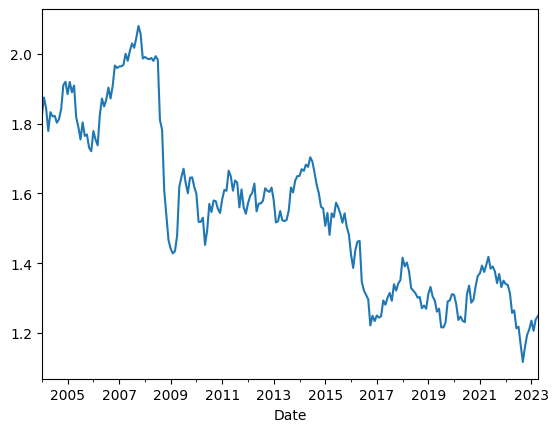

In [6]:
data.price_gbp.plot()

<Axes: xlabel='Date'>

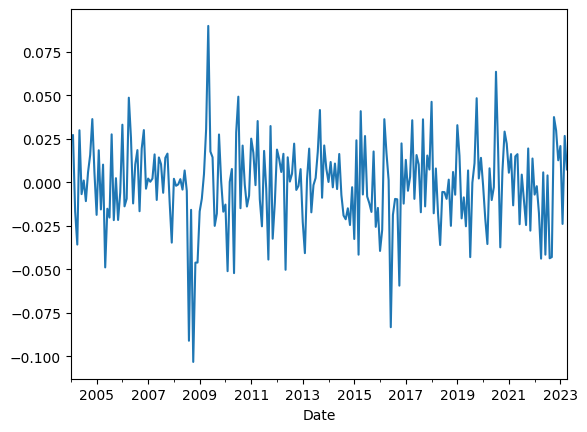

In [7]:
data.ret_gbp.plot()

In [8]:
# estimate random walk model
data['const'] = 1 # construct the constant term
y = data.ret_gbp
x = data.const
res_rw = sm.OLS(y,x,missing='drop').fit()
print(res_rw.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_gbp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Apr 2023   Prob (F-statistic):                nan
Time:                        06:10:26   Log-Likelihood:                 521.93
No. Observations:                 231   AIC:                            -1042.
Df Residuals:                     230   BIC:                            -1038.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.002     -0.987      0.3

In [32]:
data['ret_gbp_1'] = data.ret_gbp.shift() # add lag-one term
data['ret_gbp_2'] = data.ret_gbp.shift(2) # add lag-two term
# estimate AR(1)
y = data.ret_gbp
x = sm.add_constant(data['ret_gbp_1'])
res_ar1 = sm.OLS(y,x,missing='drop').fit()
print(res_ar1.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_gbp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6096
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.436
Time:                        07:14:59   Log-Likelihood:                 520.12
No. Observations:                 230   AIC:                            -1036.
Df Residuals:                     228   BIC:                            -1029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.002     -1.005      0.3

In [10]:
# estimate AR(2)
y = data.ret_gbp
x = sm.add_constant(data[['ret_gbp_1','ret_gbp_2']])
res_ar2 = sm.OLS(y,x,missing='drop').fit()
print(res_ar2.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_gbp   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.069
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.129
Time:                        06:11:12   Log-Likelihood:                 519.31
No. Observations:                 229   AIC:                            -1033.
Df Residuals:                     226   BIC:                            -1022.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.002     -0.833      0.4

In [ ]:
# 估計結果各項物件 
# For example, random walk model (benchmark)
#res_rw.resid # 誤差
#res_rw.params.const # 估計參數數值
#res_rw.pvalues # p-values
#res_rw.fittedvalues # fitted value of y
#res_rw.tvalues # t-value

const   -0.988617
dtype: float64

In [ ]:
data.ret_gbp[5] - res_rw.params.const

-0.00514736442036889

In [ ]:
# 估計結果各項物件 
# AR(1) model (benchmark)
#res_ar1.resid # 誤差
#res_ar1.params[1] # 估計參數數值
#res_ar1.pvalues[1] # p-values
res_ar1.fittedvalues # fitted value of y
res_ar1.tvalues[0] # t-value

-1.0068977686888365

In [ ]:
data.ret_gbp[2] - (res_ar1.params[0] + res_ar1.params[1]*data.ret_gbp[1])

-0.016433965569872876

In [ ]:
# 估計結果各項物件 
# AR(2) model (benchmark)
res_ar2.resid # 誤差
#res_ar1.params[1] # 估計參數數值
#res_ar1.pvalues[1] # p-values
#res_ar1.fittedvalues # fitted value of y
#res_ar1.tvalues[0] # t-value

Date
2004-04-01   -0.036883
2004-05-01    0.035097
2004-06-01   -0.002463
2004-07-01   -0.000902
2004-08-01   -0.008640
                ...   
2022-12-01    0.008012
2023-01-01    0.017955
2023-02-01   -0.025088
2023-03-01    0.026651
2023-04-01    0.009824
Length: 229, dtype: float64

In [ ]:
res_ar2.resid

Date
2004-04-01   -0.036883
2004-05-01    0.035097
2004-06-01   -0.002463
2004-07-01   -0.000902
2004-08-01   -0.008640
                ...   
2022-12-01    0.008012
2023-01-01    0.017955
2023-02-01   -0.025088
2023-03-01    0.026651
2023-04-01    0.009824
Length: 229, dtype: float64

In [ ]:
# resid for 2004-04-01
ans = res_ar2.resid[0]
print('2004-04的誤差為{:.4f}'.format(ans))
real_y = data.ret_gbp[3]
est_y = res_ar2.params[0]+res_ar2.params[1]*data.ret_gbp[2]+res_ar2.params[2]*data.ret_gbp[1]
myans = real_y - est_y
print('實際估算結果為{:.4f}'.format(myans))


2004-04的誤差為-0.0369
實際估算結果為-0.0369


In [12]:
# resid for 2010-01-01
loc = 9+5*12+1-1
ans = res_ar2.resid[loc]
print('2010-01的誤差為{:.4f}'.format(ans))
real_y = data.ret_gbp[loc+3]
est_y = res_ar2.params[0]+res_ar2.params[1]*data.ret_gbp[loc+2]+res_ar2.params[2]*data.ret_gbp[loc+1]
myans = real_y - est_y
print('2010-01實際估算結果為{:.4f}'.format(myans))


2010-01的誤差為-0.0107
2010-01實際估算結果為-0.0107


In [ ]:
# MSE的計算
np.mean(res_ar2.resid**2)

0.0006277325940326306

In [23]:
# compare two models
# rw & ar(1)
d1 = res_rw.resid**2 - res_ar1.resid**2 
const = np.ones(len(d1))
y = d1
x = const
res_comp = sm.OLS(y,x,missing='drop').fit(cov_type='HAC',cov_kwds={'maxlags':10})
print(res_comp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Apr 2023   Prob (F-statistic):                nan
Time:                        06:21:04   Log-Likelihood:                 1894.9
No. Observations:                 230   AIC:                            -3788.
Df Residuals:                     229   BIC:                            -3784.
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.716e-06   6.16e-06      0.278      0.7

In [26]:
# compare two models
# rw & ar(2)
d1 = res_rw.resid**2 - res_ar2.resid**2 
const = np.ones(len(d1))
y = d1
x = const
res_comp = sm.OLS(y,x,missing='drop').fit(cov_type='HAC',cov_kwds={'maxlags':10})
print(res_comp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Apr 2023   Prob (F-statistic):                nan
Time:                        06:22:55   Log-Likelihood:                 1607.4
No. Observations:                 229   AIC:                            -3213.
Df Residuals:                     228   BIC:                            -3209.
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.15e-05   1.98e-05      0.582      0.5

In [34]:
# out-of-sample: random walk
# fix parameters method 
R = 200
T = len(data)
rr = np.zeros(T-R)
for i in range(T-R):
  fit = res_rw.params[0]
  rr[i] = data.ret_gbp[i+R]- fit
rr


array([-0.03572804,  0.00803347,  0.03078562,  0.02380554,  0.00715665,
        0.01785467, -0.01160562,  0.01653211,  0.01782005, -0.0224534 ,
        0.00606003, -0.00873391, -0.02293024,  0.0210854 , -0.02612704,
        0.01531858, -0.00541746, -0.00060507, -0.01603848, -0.04222129,
        0.00735566, -0.03994745,  0.00560951, -0.04200699, -0.04131854,
        0.03911853,  0.03145679,  0.01429797,  0.02247015, -0.0222804 ,
        0.02829021,  0.00905438])

In [33]:
# out-of-sample: ar(1)
# fix parameters method 
R = 200
T = len(data)
rr = np.zeros(T-R)
for i in range(T-R):
  fit = res_ar1.params[0]+res_ar1.params[1]*data.ret_gbp[i+R-1]  
  rr[i] = data.ret_gbp[i+R]- fit
rr


array([-0.03661867,  0.00999647,  0.03049449,  0.02234245,  0.0060531 ,
        0.0176087 , -0.01240264,  0.01725258,  0.01709115, -0.02324863,
        0.00733926, -0.00892339, -0.02235769,  0.02238919, -0.02709047,
        0.01678704, -0.00608385, -0.00020334, -0.01588465, -0.04127249,
        0.00965313, -0.04020367,  0.00778986, -0.04217326, -0.03903211,
        0.0413695 ,  0.02956448,  0.01280031,  0.02185634, -0.02331516,
        0.02956054,  0.00771983])

In [36]:
# out-of-sample: ar(1)
# fix parameters method 
R = 200
T = len(data)
rr = np.zeros(T-R)
for i in range(T-R):
  fit = res_ar2.params[0]+res_ar2.params[1]*data.ret_gbp[i+R-1]+res_ar2.params[2]*data.ret_gbp[i+R-2]    
  rr[i] = data.ret_gbp[i+R]- fit
rr


array([-0.04463293,  0.0073928 ,  0.03480186,  0.0213563 ,  0.00226043,
        0.01462274, -0.01331878,  0.01494118,  0.01846892, -0.02531304,
        0.00500076, -0.0062474 , -0.02321636,  0.02330126, -0.02431267,
        0.01403803, -0.00293122, -0.00218628, -0.01531423, -0.04133601,
        0.01140401, -0.03510306,  0.00668234, -0.03735616, -0.03993174,
        0.04630323,  0.03464631,  0.00800925,  0.017954  , -0.02509252,
        0.02665306,  0.01043886])

In [ ]:
# newey-west standard error
sm.OLS(y,x,missing='drop').fit(cov_type='HAC',cov_kwds={'maxlags':1})